# Polarized Gowdy Spacetime
##  Geoff Cope
##  University of Utah
##  December 22, 2021

The Polarized Gowdy Spacetime Metric is taken from the paper "SHOCK WAVES AND GRAVITATIONAL WAVES
IN MATTER SPACETIMES WITH GOWDY SYMMETRY" by LeFloch and Stewart.  See Equation 2.1

http://emis.maths.adelaide.edu.au/journals/PM/62f3/pm62f308.pdf

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
a,b,c,t,x,y,z,dt,dx,dy,dz = symbols( 'a b c t x y z dt dx dy dz' ) 

In [4]:
variables = Matrix( [t,x,y,z])
variables

⎡t⎤
⎢ ⎥
⎢x⎥
⎢ ⎥
⎢y⎥
⎢ ⎥
⎣z⎦

In [6]:
differentials = Matrix( [dt,dx,dy,dz])
differentials

⎡dt⎤
⎢  ⎥
⎢dx⎥
⎢  ⎥
⎢dy⎥
⎢  ⎥
⎣dz⎦

In [7]:
a = Function('a')(t,x)
a

In [8]:
b = Function('b')(t,x)
b

In [9]:
c = Function('c')(t,x)
c

In [14]:
lineElement = expand(exp(2*a)*( (-1)*dt**2 + dx**2 ) - exp(2*b) * ( exp(2*c) * dy**2 + exp(-2*c) * dz**2 ))
lineElement

In [15]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  2⋅a(t, x)                                                             ⎤
⎢-ℯ               0                 0                        0           ⎥
⎢                                                                        ⎥
⎢              2⋅a(t, x)                                                 ⎥
⎢     0       ℯ                     0                        0           ⎥
⎢                                                                        ⎥
⎢                           2⋅b(t, x)  2⋅c(t, x)                         ⎥
⎢     0           0       -ℯ         ⋅ℯ                      0           ⎥
⎢                                                                        ⎥
⎢                                                   2⋅b(t, x)  -2⋅c(t, x)⎥
⎣     0           0                 0             -ℯ         ⋅ℯ          ⎦

In [16]:
import sympy

In [17]:
m = sympy.Array(g)
m

⎡  2⋅a(t, x)                                                             ⎤
⎢-ℯ               0                 0                        0           ⎥
⎢                                                                        ⎥
⎢              2⋅a(t, x)                                                 ⎥
⎢     0       ℯ                     0                        0           ⎥
⎢                                                                        ⎥
⎢                           2⋅b(t, x)  2⋅c(t, x)                         ⎥
⎢     0           0       -ℯ         ⋅ℯ                      0           ⎥
⎢                                                                        ⎥
⎢                                                   2⋅b(t, x)  -2⋅c(t, x)⎥
⎣     0           0                 0             -ℯ         ⋅ℯ          ⎦

In [18]:
from einsteinpy.symbolic import *

In [19]:
syms = sympy.symbols("t x y z")
t,x,y,z = syms

In [22]:
metric = MetricTensor(m,syms) 

In [25]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡∂            ∂                                                                            
⎢⎢──(a(t, x))  ──(a(t, x))                                 0                                
⎢⎢∂t           ∂x                                                                           
⎢⎢                                                                                          
⎢⎢∂            ∂                                                                            
⎢⎢──(a(t, x))  ──(a(t, x))                                 0                                
⎢⎢∂x           ∂t                                                                           
⎢⎢                                                                                          
⎢⎢                           ⎛∂             ∂          ⎞  -2⋅a(t, x) + 2⋅b(t, x) + 2⋅c(t, x)
⎢⎢     0            0       -⎜──(b(t, x)) + ──(c(t, x))⎟⋅ℯ                                  
⎢⎢                           ⎝∂t            ∂t         ⎠              

In [26]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                              2                                          2                 
⎢  ∂           ∂              ∂               ∂           ∂              ∂               ⎛∂ 
⎢2⋅──(a(t, x))⋅──(b(t, x)) - ───(a(t, x)) + 2⋅──(a(t, x))⋅──(b(t, x)) + ───(a(t, x)) - 2⋅⎜──
⎢  ∂t          ∂t              2              ∂x          ∂x              2              ⎝∂t
⎢                            ∂t                                         ∂x                  
⎢                                                                                           
⎢                                                                                           
⎢       ∂           ∂               ∂           ∂               ∂           ∂               
⎢     2⋅──(a(t, x))⋅──(b(t, x)) + 2⋅──(a(t, x))⋅──(b(t, x)) - 2⋅──(b(t, x))⋅──(b(t, x)) - 2⋅
⎢       ∂t          ∂x              ∂x          ∂t              ∂t          ∂x              
⎢                                                                     

In [27]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                         2                 
⎢  ∂           ∂               ∂           ∂                 ⎛∂          ⎞        ⎛∂        
⎢2⋅──(a(t, x))⋅──(b(t, x)) + 2⋅──(a(t, x))⋅──(b(t, x)) + 1.0⋅⎜──(b(t, x))⎟  - 3.0⋅⎜──(b(t, x
⎢  ∂t          ∂t              ∂x          ∂x                ⎝∂t         ⎠        ⎝∂x       
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢            ∂           ∂               ∂           ∂               ∂           ∂          
⎢          2⋅──(a(t, x))⋅──(b(t, x)) + 2⋅──(a(t, x))⋅──(b(t, x)) - 2⋅──(b(t, x))⋅──(b(t, x))
⎢            ∂t          ∂x              ∂x          ∂t              ∂t          ∂x         
⎢                                                                     

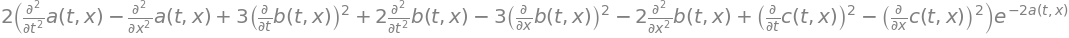

In [28]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [29]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [30]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     